In [69]:
%matplotlib inline

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

In [4]:
import graphviz 
def plot_tree(clf,feature_names, class_names):
    dot_data = tree.export_graphviz(clf, out_file=None, 
                             feature_names=feature_names,  
                             class_names=class_names,  
                             filled=True,rounded=True,  
                             special_characters=True)  
    graph = graphviz.Source(dot_data)  
    return graph
def save_tree(graph,name):
    graph.render(name, view=False)

# Load source model

In [2]:
source_model = pickle.load(open("source_models/source_D10_C10_Projected_8-10_model.pickle","rb"))

# Test Transfer
+ Load data: 4000 to transfer, 1000 to test quality
+ Transfer
+ Compute Quality Scores
+ Save Model, Quality and Plots

In [15]:
from os import listdir
from os.path import join,isfile
import copy
import sys

In [16]:
sys.path.append("..")

In [6]:
from sklearn.metrics import recall_score,precision_score,f1_score,accuracy_score

In [27]:
from SER_rec import SER
from STRUT import STRUT

In [31]:
def full_evaluation(clf,X_test,Y_test):
    Y_pred = clf.predict(X_test)
    recall = recall_score(y_pred=Y_pred,y_true=Y_test,average='weighted')
    precision = precision_score(y_pred=Y_pred,y_true=Y_test,average='weighted')
    f1 = f1_score(y_pred=Y_pred,y_true=Y_test,average='weighted')
    accuracy = accuracy_score(y_pred=Y_pred,y_true=Y_test)
    return {"recall":recall,"precision":precision,"f1":f1,"accuracy":accuracy}

# Use a large sample

In [45]:
folder_target_datasets = "synthetic_datasets/target/"
folder_target_models = "target_models/"
strut_results_large_sample = pd.DataFrame(columns=["recall","precision","f1","accuracy"])
#ser_results = pd.DataFrame(columns=["recall","precision","f1","accuracy"])
source_results_large_sample = pd.DataFrame(columns=["recall","precision","f1","accuracy"])
for fname in listdir(folder_target_datasets):
    print fname
    if ".csv" in fname and fname[0] != ".":
        path = join(folder_target_datasets,fname)
        if isfile(path):
            df = pd.read_csv(path,index_col=0,header=0)
            # generate train set
            df_train = df.iloc[:4000,:]
            X_train = df_train[[str(_) for _ in range(10)]].values
            Y_train = df_train["cluster"].values
            # generate test set
            df_test = df.iloc[4000:,:]
            X_test = df_test[[str(_) for _ in range(10)]].values
            Y_test = df_test["cluster"].values
            # transfer
            target_model_ser = copy.deepcopy(source_model)
            target_model_strut = copy.deepcopy(source_model)
            STRUT(target_model_strut,0,X_train,Y_train,1)
            #SER(0, target_model_ser, X_train,Y_train)
            # Evaluate
            strut_results_large_sample.loc[fname] = full_evaluation(target_model_strut,X_test,Y_test)
            #ser_resutls.loc[fname] = full_evaluation(target_model_ser,X_test,Y_test)
            source_results_large_sample.loc[fname] = full_evaluation(source_model,X_test,Y_test)
            # Save results
            base_name = fname.split(".")[0]
            strut_folder = join(folder_target_models,"STRUT/large_sample/")
            strut_base_name = join(strut_folder,base_name)
            pickle.dump(target_model_strut, open(strut_base_name+".pickle","wb"))
            graph = plot_tree(target_model_strut,["f"+str(f) for f in range(10)], ["c"+str(c) for c in range(10)])
            save_tree(graph,strut_base_name+"_graph.gv")

.DS_Store
target_D10_C10_Projected_8-10_df_bigger_cluster_0.csv
target_D10_C10_Projected_8-10_df_bigger_cluster_1.csv
target_D10_C10_Projected_8-10_df_bigger_cluster_2.csv
target_D10_C10_Projected_8-10_df_bigger_cluster_3.csv
target_D10_C10_Projected_8-10_df_bigger_cluster_4.csv
target_D10_C10_Projected_8-10_df_bigger_cluster_5.csv
target_D10_C10_Projected_8-10_df_bigger_cluster_6.csv
target_D10_C10_Projected_8-10_df_bigger_cluster_7.csv
target_D10_C10_Projected_8-10_df_bigger_cluster_8.csv
target_D10_C10_Projected_8-10_df_bigger_cluster_9.csv
target_D10_C10_Projected_8-10_df_density_feature_0.csv
target_D10_C10_Projected_8-10_df_density_feature_1.csv
target_D10_C10_Projected_8-10_df_density_feature_2.csv
target_D10_C10_Projected_8-10_df_density_feature_3.csv
target_D10_C10_Projected_8-10_df_density_feature_4.csv
target_D10_C10_Projected_8-10_df_density_feature_5.csv
target_D10_C10_Projected_8-10_df_density_feature_6.csv
target_D10_C10_Projected_8-10_df_density_feature_7.csv
target_D10

# Use a Small sample

In [60]:
folder_target_datasets = "synthetic_datasets/target/"
folder_target_models = "target_models/"
strut_results_small_sample = pd.DataFrame(columns=["recall","precision","f1","accuracy"])
#ser_results = pd.DataFrame(columns=["recall","precision","f1","accuracy"])
source_results_small_sample = pd.DataFrame(columns=["recall","precision","f1","accuracy"])
for fname in listdir(folder_target_datasets):
    print fname
    if ".csv" in fname and fname[0] != ".":
        path = join(folder_target_datasets,fname)
        if isfile(path):
            df = pd.read_csv(path,index_col=0,header=0)
            # generate train set
            df_train = df.iloc[:50,:]
            X_train = df_train[[str(_) for _ in range(10)]].values
            Y_train = df_train["cluster"].values
            # generate test set
            df_test = df.iloc[50:,:]
            X_test = df_test[[str(_) for _ in range(10)]].values
            Y_test = df_test["cluster"].values
            # transfer
            target_model_ser = copy.deepcopy(source_model)
            target_model_strut = copy.deepcopy(source_model)
            STRUT(target_model_strut,0,X_train,Y_train,1)
            #SER(0, target_model_ser, X_train,Y_train)
            # Evaluate
            strut_results_small_sample.loc[fname] = full_evaluation(target_model_strut,X_test,Y_test)
            #ser_resutls.loc[fname] = full_evaluation(target_model_ser,X_test,Y_test)
            source_results_small_sample.loc[fname] = full_evaluation(source_model,X_test,Y_test)
            # Save results
            base_name = fname.split(".")[0]
            strut_folder = join(folder_target_models,"STRUT/small_sample/")
            strut_base_name = join(strut_folder,base_name)
            pickle.dump(target_model_strut, open(strut_base_name+".pickle","wb"))
            graph = plot_tree(target_model_strut,["f"+str(f) for f in range(10)], ["c"+str(c) for c in range(10)])
            save_tree(graph,strut_base_name+"_graph.gv")

.DS_Store
target_D10_C10_Projected_8-10_df_bigger_cluster_0.csv
target_D10_C10_Projected_8-10_df_bigger_cluster_1.csv
target_D10_C10_Projected_8-10_df_bigger_cluster_2.csv
target_D10_C10_Projected_8-10_df_bigger_cluster_3.csv
target_D10_C10_Projected_8-10_df_bigger_cluster_4.csv
target_D10_C10_Projected_8-10_df_bigger_cluster_5.csv
target_D10_C10_Projected_8-10_df_bigger_cluster_6.csv
target_D10_C10_Projected_8-10_df_bigger_cluster_7.csv
target_D10_C10_Projected_8-10_df_bigger_cluster_8.csv
target_D10_C10_Projected_8-10_df_bigger_cluster_9.csv
target_D10_C10_Projected_8-10_df_density_feature_0.csv
target_D10_C10_Projected_8-10_df_density_feature_1.csv
target_D10_C10_Projected_8-10_df_density_feature_2.csv
target_D10_C10_Projected_8-10_df_density_feature_3.csv
target_D10_C10_Projected_8-10_df_density_feature_4.csv
target_D10_C10_Projected_8-10_df_density_feature_5.csv
target_D10_C10_Projected_8-10_df_density_feature_6.csv
target_D10_C10_Projected_8-10_df_density_feature_7.csv
target_D10

# Degradation due to small sample

In [67]:
strut_results_small_sample.index = [ index.split("df_")[-1] for index in strut_results_small_sample.index]
strut_results_large_sample.index = [ index.split("df_")[-1] for index in strut_results_large_sample.index]

In [68]:
degradation = (strut_results_small_sample - strut_results_large_sample).abs()

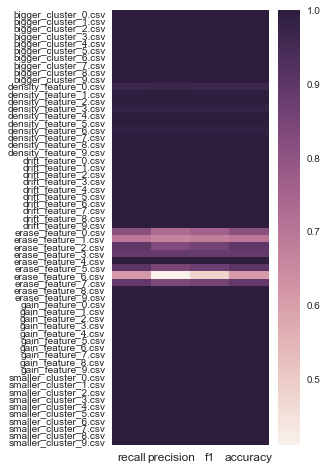

In [79]:
fig, ax = plt.subplots(figsize=(3.5,8))
sns.heatmap(strut_results_large_sample,ax=ax)
_=plt.xticks(fontsize=12)
_=plt.yticks(fontsize=10)

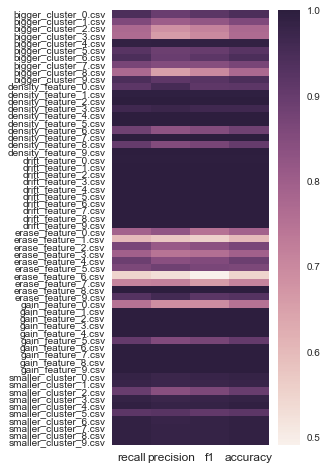

In [80]:
fig, ax = plt.subplots(figsize=(3.5,8))
sns.heatmap(strut_results_small_sample,ax=ax)
_=plt.xticks(fontsize=12)
_=plt.yticks(fontsize=10)

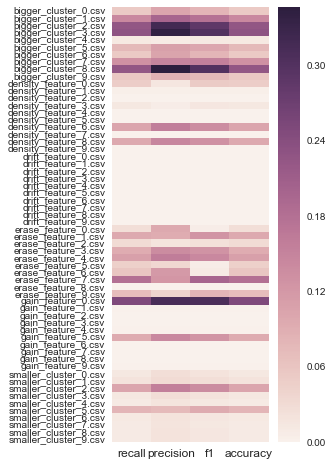

In [81]:
fig, ax = plt.subplots(figsize=(3.5,8))
sns.heatmap(degradation,ax=ax)
_=plt.xticks(fontsize=12)
_=plt.yticks(fontsize=10)